## Import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

## Read data

In [7]:
filename = '../AirTracks/all_csv/Jan2017/trails.csv'
# chunksize = 10 ** 6
# for chunk in pd.read_csv(filename, chunksize=chunksize):
#     print(chunk)

In [8]:
df = pd.read_csv(filename, 
                 nrows=1_000_000)
df.head()

,FlightId,Timestamp,Latitude,Longitude,Altitude,Heading,Speed
0,c244ac4,1484158880,59.416901,24.801247,0,0,0
1,c244ac4,1484158946,59.416901,24.801178,0,0,0
2,c244ac4,1484159014,59.417221,24.801292,0,357,14
3,c244ac4,1484159029,59.417450,24.801281,0,352,11
4,c244ac4,1484159047,59.417496,24.801683,0,86,15


In [9]:
# Rename columns
df.columns = df.columns.map(lambda x: x.lower())
df.rename(columns={'flightid': 'flight_id', 'timestamp': 'time_stamp'}, inplace=True)

In [10]:
df.shape

(1000000, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   flight_id   1000000 non-null  object 
 1   time_stamp  1000000 non-null  int64  
 2   latitude    1000000 non-null  float64
 3   longitude   1000000 non-null  float64
 4   altitude    1000000 non-null  int64  
 5   heading     1000000 non-null  int64  
 6   speed       1000000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 53.4+ MB


## Duplicates

In [12]:
df[df.duplicated()]

,flight_id,time_stamp,latitude,longitude,altitude,heading,speed


No duplicates observed.

## Check for null values

In [13]:
df.isnull().sum()

flight_id     0
time_stamp    0
latitude      0
longitude     0
altitude      0
heading       0
speed         0
dtype: int64

**flight_id**

In [14]:
df['flight_id'].value_counts()

c0edde0    1915
c1271ac    1848
c45cb8f    1816
c2252cc    1790
c477816    1377
           ... 
c3cf586       3
c4e0161       2
c1c26d2       2
c24ed8e       1
c18e97a       1
Name: flight_id, Length: 4845, dtype: int64

**time_stamp**

In [15]:
def get_utc_datetime(value):
    try:
        return datetime.fromtimestamp(value)
    except:
        return pd.NaT
    
df['time_stamp_utc'] = df['time_stamp'].map(get_utc_datetime)

In [16]:
df['time_stamp_utc'].min()

Timestamp('2016-12-31 19:16:37')

In [17]:
df['time_stamp_utc'].max()

Timestamp('2017-01-31 23:40:38')

**latitude**

In [18]:
df['latitude'].min()

-46.023468

In [19]:
df['latitude'].max()

88.86666899999999

**longitude**

In [20]:
df['longitude'].min()

-179.999802

In [21]:
df['longitude'].max()

180.0

**altitude**

In [22]:
df['altitude'].min()

0

In [23]:
df['altitude'].max()

45000

Text(0.5, 1.0, 'Histogram of Altitude')

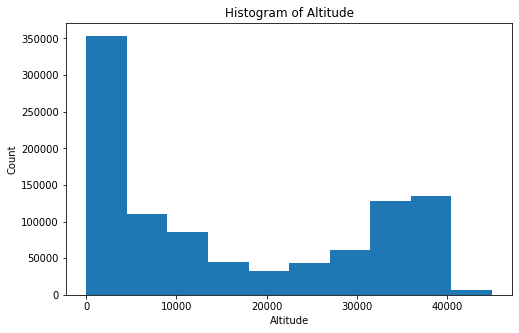

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(df['altitude'])
plt.xlabel('Altitude')
plt.ylabel('Count')
plt.title('Histogram of Altitude')

Observation: Aircrafts seem to be on the ground for a large proportion of time

**heading**

In [25]:
df['heading'].min()

0

In [26]:
df['heading'].max()

360

Text(0.5, 1.0, 'Histogram of Heading')

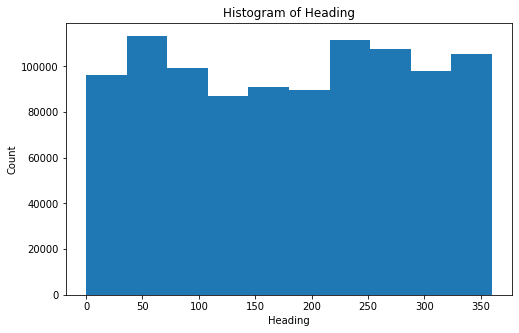

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(df['heading'])
plt.xlabel('Heading')
plt.ylabel('Count')
plt.title('Histogram of Heading')

Observation: heading seems to be uniformly distributed.

**speed**

In [28]:
df['speed'].min()

0

In [29]:
df['speed'].max()

746

Text(0.5, 1.0, 'Histogram of Speed')

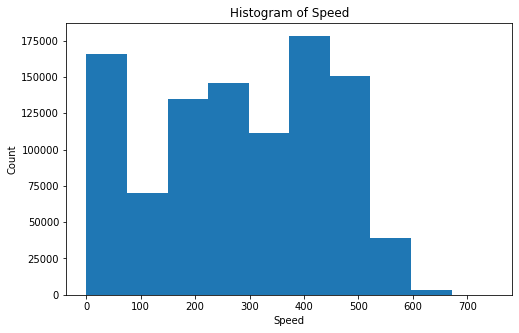

In [30]:
plt.figure(figsize=(8, 5))
plt.hist(df['speed'])
plt.xlabel('Speed')
plt.ylabel('Count')
plt.title('Histogram of Speed')

Observation: 
- Multiple peaks (modes) around 0, ~200-300, ~400. 
- Not normally distributed. 
- Ranges between 0 and 746 kph

## Analysis of a single flight (flight_id = c244ac4)

In [31]:
df.loc[df['flight_id'] == 'c244ac4', :].shape

(188, 8)

In [32]:
df.loc[df['flight_id'] == 'c244ac4', :]

,flight_id,time_stamp,latitude,longitude,altitude,heading,speed,time_stamp_utc
0,c244ac4,1484158880,59.416901,24.801247,0,0,0,2017-01-12 02:21:20
1,c244ac4,1484158946,59.416901,24.801178,0,0,0,2017-01-12 02:22:26
2,c244ac4,1484159014,59.417221,24.801292,0,357,14,2017-01-12 02:23:34
3,c244ac4,1484159029,59.417450,24.801281,0,352,11,2017-01-12 02:23:49
4,c244ac4,1484159047,59.417496,24.801683,0,86,15,2017-01-12 02:24:07
...,...,...,...,...,...,...,...,...
183,c244ac4,1484163236,59.656715,17.944084,0,255,18,2017-01-12 03:33:56
184,c244ac4,1484163242,59.656574,17.943008,0,255,17,2017-01-12 03:34:02
185,c244ac4,1484163288,59.655499,17.934471,0,255,16,2017-01-12 03:34:48
186,c244ac4,1484163303,59.654766,17.933395,0,185,15,2017-01-12 03:35:03


In [33]:
aggregations = {
    'latitude': [min, max],
    'longitude': [min, max],
    'altitude': [min, max],
    'heading': [min, max],
    'speed': [min, max],
    'time_stamp_utc': [min, max]
}

df.loc[df['flight_id'] == 'c244ac4'].groupby('flight_id').agg(aggregations)

latitude             longitude           altitude        heading  \
                 min        max        min       max      min    max     min   
flight_id                                                                      
c244ac4    59.413284  59.823025  17.933395  24.92532        0  20000       0   

               speed           time_stamp_utc                      
           max   min  max                 min                 max  
flight_id                                                          
c244ac4    357     0  316 2017-01-12 02:21:20 2017-01-12 03:35:09

In [34]:
# inclusive of on-ground activity
df.loc[(df['flight_id'] == 'c244ac4'), 'time_stamp_utc'].max() -\
df.loc[(df['flight_id'] == 'c244ac4'), 'time_stamp_utc'].min()

Timedelta('0 days 01:13:49')

In [35]:
df.loc[(df['flight_id'] == 'c244ac4') & (df['altitude'] > 0), 'time_stamp_utc'].max() -\
df.loc[(df['flight_id'] == 'c244ac4') & (df['altitude'] > 0), 'time_stamp_utc'].min()

Timedelta('0 days 01:00:53')

In [36]:
min_time_in_air_index = df.loc[(df['flight_id'] == 'c244ac4') & (df['altitude'] > 0), 'time_stamp_utc'].idxmin()
print(min_time_in_air_index)
df.loc[(df['flight_id'] == 'c244ac4'), :].loc[min_time_in_air_index-1:min_time_in_air_index]

28


,flight_id,time_stamp,latitude,longitude,altitude,heading,speed,time_stamp_utc
27,c244ac4,1484159240,59.413307,24.819122,0,90,100,2017-01-12 02:27:20
28,c244ac4,1484159246,59.413284,24.824799,575,90,120,2017-01-12 02:27:26


In [37]:
max_time_in_air_index = df.loc[(df['flight_id'] == 'c244ac4') & (df['altitude'] > 0), 'time_stamp_utc'].idxmax()
print(max_time_in_air_index)
df.loc[(df['flight_id'] == 'c244ac4'), :].loc[max_time_in_air_index:max_time_in_air_index + 1]

177


,flight_id,time_stamp,latitude,longitude,altitude,heading,speed,time_stamp_utc
177,c244ac4,1484162899,59.659195,17.962555,1350,189,101,2017-01-12 03:28:19
178,c244ac4,1484163135,59.650421,17.955093,0,354,27,2017-01-12 03:32:15


In [38]:
print(df.loc[177, 'time_stamp_utc'] - df.loc[28, 'time_stamp_utc'])
df.loc[max_time_in_air_index, 'time_stamp_utc'] -\
df.loc[min_time_in_air_index, 'time_stamp_utc']

0 days 01:00:53


Timedelta('0 days 01:00:53')

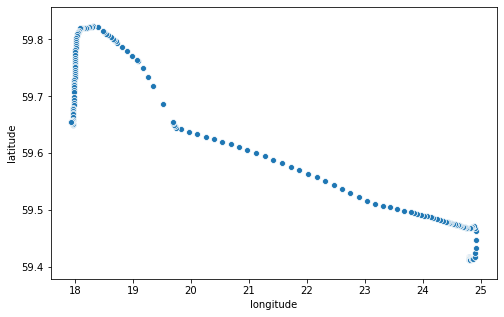

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(ax = ax, x='longitude', y='latitude', data=df.loc[(df['flight_id'] == 'c244ac4')])
plt.show()

In [40]:
df.loc[(df['flight_id'] == 'c244ac4'), 'heading']

0        0
1        0
2      357
3      352
4       86
      ... 
183    255
184    255
185    255
186    185
187    165
Name: heading, Length: 188, dtype: int64

In [41]:
print(df.loc[(df['flight_id'] == 'c244ac4'), 'heading'].values)

[  0   0 357 352  86  94  94  98 101 104 115 129 129 129 180 182 180 182
 194 196 174 146 135  98  92  90  90  90  90  88  90  90  55  35  20   2
 326 307 287 262 262 265 266 272 274 274 274 274 274 274 274 274 274 274
 274 273 273 273 273 273 273 273 273 273 273 272 272 273 272 272 272 272
 272 272 272 272 272 275 275 275 275 275 274 274 274 274 274 274 274 274
 274 274 273 273 273 273 273 273 273 272 284 287 288 289 290 289 289 289
 289 280 279 280 280 280 280 280 279 278 278 277 278 278 279 281 267 267
 266 266 266 266 269 272 272 273 270 241 241 240 240 238 216 206 201 196
 194 191 188 187 187 187 188 188 187 188 189 190 190 189 190 191 188 189
 191 191 190 190 191 190 189 191 189 191 190 191 190 190 190 189 354 345
 343 345 320 255 255 255 185 165]
